In [68]:
# Kindly change the below cells from markdown to code and execute it 
# supress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# 'Os' module provides functions for interacting with the operating system 
import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
#from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot
from math import sqrt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 'SciPy' is used to perform scientific computations
from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats

In [69]:
df_soilhealth=pd.read_excel("EDA_SOilHealth.xlsx")

df_soilhealth.head()

,Unnamed: 0,pH,EC (ds/m),OC (%),Available N (kg/ha),Avaiable P2O5 (Kg/ha),Available K 20 (kg/ha ),CEC (meq/100gram),Ca 2+ (meq/100gram),Mg 2+ (meq/100gram),...,Total porosity(%),Maximum water holding capacity (%),Volume Expansion %,FC (%) at 0.3 bar,PWP (% ) at 15 bar,Available Water (%),Microaggregate % ( MIG),Macroaggregate % (MAG),MWD,SQI
0,3,4.5,0.59,0.94,412.69,21.76,110.07,10.2,2.15,1.34,...,44.303797,41.5,9.52,30.52,5.46,25.06,49.602941,50.397059,1.819625,0.800230
1,12,5.1,0.59,1.03,450.25,32.68,287.07,10.2,1.53,1.16,...,44.155844,37.5,8.12,31.22,6.52,24.70,36.814462,63.185538,2.100144,0.791114
2,13,4.9,0.61,0.97,454.23,34.68,228.46,10.7,1.81,1.45,...,43.497758,36.4,7.52,30.26,6.48,23.78,36.961538,63.038462,2.074770,0.810275
3,28,4.5,0.68,0.65,282.56,14.28,155.30,8.5,1.64,0.52,...,47.698745,38.2,8.12,33.43,7.55,25.88,43.197964,56.802036,1.837323,0.670725
4,29,4.4,0.64,0.66,298.82,12.34,83.12,8.8,1.66,0.72,...,51.452282,36.0,7.46,30.41,4.65,25.76,45.608295,54.391705,1.960723,0.695252


In [70]:
# Dependant (Target) Variable:
y = df_soilhealth['SQI']
# Independant Variables:
X = df_soilhealth.drop(['SQI'],axis=1)
X.head()

,Unnamed: 0,pH,EC (ds/m),OC (%),Available N (kg/ha),Avaiable P2O5 (Kg/ha),Available K 20 (kg/ha ),CEC (meq/100gram),Ca 2+ (meq/100gram),Mg 2+ (meq/100gram),...,BD (gm/cm3)** core method,Total porosity(%),Maximum water holding capacity (%),Volume Expansion %,FC (%) at 0.3 bar,PWP (% ) at 15 bar,Available Water (%),Microaggregate % ( MIG),Macroaggregate % (MAG),MWD
0,3,4.5,0.59,0.94,412.69,21.76,110.07,10.2,2.15,1.34,...,1.32,44.303797,41.5,9.52,30.52,5.46,25.06,49.602941,50.397059,1.819625
1,12,5.1,0.59,1.03,450.25,32.68,287.07,10.2,1.53,1.16,...,1.29,44.155844,37.5,8.12,31.22,6.52,24.70,36.814462,63.185538,2.100144
2,13,4.9,0.61,0.97,454.23,34.68,228.46,10.7,1.81,1.45,...,1.26,43.497758,36.4,7.52,30.26,6.48,23.78,36.961538,63.038462,2.074770
3,28,4.5,0.68,0.65,282.56,14.28,155.30,8.5,1.64,0.52,...,1.25,47.698745,38.2,8.12,33.43,7.55,25.88,43.197964,56.802036,1.837323
4,29,4.4,0.64,0.66,298.82,12.34,83.12,8.8,1.66,0.72,...,1.17,51.452282,36.0,7.46,30.41,4.65,25.76,45.608295,54.391705,1.960723


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=70)

In [72]:
print('Dimensions of the training feature matrix: {}'.format(X_train.shape))
print('Dimensions of the training target vector: {}'.format(y_train.shape))
print('Dimensions of the test feature matrix: {}'.format(X_test.shape))
print('Dimensions of the test target vector: {}'.format(y_test.shape))

Dimensions of the training feature matrix: (88, 32)
Dimensions of the training target vector: (88,)
Dimensions of the test feature matrix: (38, 32)
Dimensions of the test target vector: (38,)


In [73]:
X_train.describe()

,Unnamed: 0,pH,EC (ds/m),OC (%),Available N (kg/ha),Avaiable P2O5 (Kg/ha),Available K 20 (kg/ha ),CEC (meq/100gram),Ca 2+ (meq/100gram),Mg 2+ (meq/100gram),...,BD (gm/cm3)** core method,Total porosity(%),Maximum water holding capacity (%),Volume Expansion %,FC (%) at 0.3 bar,PWP (% ) at 15 bar,Available Water (%),Microaggregate % ( MIG),Macroaggregate % (MAG),MWD
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,...,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,101.522727,5.346591,0.529886,0.789886,375.789318,25.875227,169.308864,6.185227,1.238523,0.791023,...,1.318409,47.114210,32.732955,7.979432,27.990000,6.548295,21.441705,41.837864,58.162136,1.877644
std,47.086122,0.666945,0.135955,0.240701,87.096293,13.460303,84.675307,1.405616,0.390804,0.208762,...,0.075580,2.891084,4.439031,0.870648,4.503043,1.174865,4.842598,3.562784,3.562784,0.111057
min,3.000000,4.200000,0.260000,0.210000,200.740000,7.020000,49.100000,4.400000,0.810000,0.420000,...,1.140000,41.228070,26.700000,6.210000,20.400000,4.450000,14.780000,35.854651,47.400922,1.597663
25%,54.500000,4.875000,0.477500,0.567500,297.657500,14.435000,101.190000,5.300000,0.937500,0.627500,...,1.280000,44.914771,29.250000,7.417500,24.607500,5.595000,18.002500,39.489819,56.435172,1.806297
50%,101.500000,5.200000,0.535000,0.850000,372.670000,21.720000,139.700000,5.650000,1.040000,0.780000,...,1.330000,46.916972,30.700000,7.880000,27.385000,6.510000,20.025000,41.259697,58.740303,1.862522
75%,141.250000,5.825000,0.620000,1.012500,451.805000,36.502500,237.532500,7.425000,1.565000,0.950000,...,1.370000,49.168388,36.475000,8.427500,30.525000,7.620000,25.015000,43.564828,60.510181,1.936250
max,179.000000,6.700000,0.790000,1.200000,525.860000,56.940000,398.360000,10.200000,2.150000,1.340000,...,1.460000,53.333333,42.900000,10.850000,36.680000,8.980000,31.860000,52.599078,64.145349,2.194756


In [74]:
y_train.describe()

count    88.000000
mean      0.591834
std       0.064260
min       0.496235
25%       0.540293
50%       0.573741
75%       0.640786
max       0.800230
Name: SQI, dtype: float64

In [75]:
y_test.describe()

count    38.000000
mean      0.602632
std       0.062634
min       0.486181
25%       0.563823
50%       0.594206
75%       0.642325
max       0.810275
Name: SQI, dtype: float64

# Statistical Model

In [76]:
var = 0 
for i in range(11):
    if stats.ttest_ind(X_train.iloc[:,i], X_test.iloc[:,i])[1] < .05:
    #ALl the columns have pvalue>0.05 , hence we accept the null hypothesis that the means of all the columns are equal
        var = var + 1
        print('There is a strong variation in ', xtrain.columns[i])
if var == 0:
    print('XTest & XTrain have similar type of data')

XTest & XTrain have similar type of data


In [77]:
#ALl the columns have pvalue>0.05 , hence we accept the null hypothesis that the means of all the columns are equal
#Similarly for ytest, ytrain
if stats.ttest_ind(y_train, y_test)[1] > .5:
    print('y_test & y_train contain similar type of data')

In [78]:
X_constant = sm.add_constant(X_train)
lin_reg = sm.OLS(y_train,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SQI   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.170e+25
Date:                Sun, 16 Oct 2022   Prob (F-statistic):               0.00
Time:                        14:23:18   Log-Likelihood:                 2672.5
No. Observations:                  88   AIC:                            -5283.
Df Residuals:                      57   BIC:                            -5206.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               2.686e-05   3.02e-16    8.9e+10      0.000    2.69e-05    2.69e-05
Unnamed: 0                         -1.778e-17   2.63e-16     -0.068      0.946   -5.44e-16    5.09e-16
pH                                 -6.939e-16   7.32e-15     -0.095      0.925   -1.54e-14     1.4e-14
EC (ds/m)                           3.553e-15   4.08e-14      0.087      0.931   -7.81e-14    8.52e-14
OC (%)                                 0.1000   2.19e-14   4.56e+12      0.000       0.100       0.100
Available N (kg/ha)                -2.261e-17   4.84e-17     -0.467      0.642    -1.2e-16    7.43e-17
Avaiable P2O5 (Kg/ha)                  0.0015    3.1e-16   4.87e+12      0.000       0.002       0.002
Available K 20 (kg/ha )              8.89e-18   1.41e-16      0.063      0.950   -2.73e-16     2.9e-16
CEC (meq/100gram)                      0.0457    1.8e-14   2.54e+12      0.000       0.046       0.046
Ca 2+ (meq/100gram)                -1.943e-15   3.44e-14     -0.056      0.955   -7.09e-14     6.7e-14
Mg 2+ (meq/100gram)                -9.437e-16    3.6e-14     -0.026      0.979    -7.3e-14    7.11e-14
Na 2+ (meq/100 gram)                -1.11e-15   8.64e-14     -0.013      0.990   -1.74e-13    1.72e-13
% Base saturation                   1.145e-16   1.95e-15      0.059      0.953    -3.8e-15    4.02e-15
Fe (ppm)                            2.472e-17   1.36e-16      0.182      0.856   -2.47e-16    2.96e-16
Cu (ppm)                           -1.665e-16   2.69e-15     -0.062      0.951   -5.55e-15    5.22e-15
Mn (ppm)                           -5.204e-18   4.29e-16     -0.012      0.990   -8.65e-16    8.55e-16
Zn(ppm)                             8.327e-17   1.05e-14      0.008      0.994    -2.1e-14    2.12e-14
S (ppm)                            -2.602e-18   5.84e-16     -0.004      0.996   -1.17e-15    1.17e-15
SAND (%)                           -7.772e-16   8.09e-15     -0.096      0.924    -1.7e-14    1.54e-14
SILT(%)                            -7.702e-16   8.06e-15     -0.096      0.924   -1.69e-14    1.54e-14
CLAY (%)                           -8.327e-16   8.35e-15     -0.100      0.921   -1.76e-14    1.59e-14
Hydraulic Conductivity (cm/hr)     -6.245e-17   3.95e-15     -0.016      0.987   -7.96e-15    7.84e-15
PD (gm/cm3) **Pycnometer           -1.599e-14   5.37e-13     -0.030      0.976   -1.09e-12    1.06e-12
BD (gm/cm3)** core method           2.842e-14   9.94e-13      0.029      0.977   -1.96e-12    2.02e-12
Total porosity(%)                      0.0017   2.45e-14   6.82e+10      0.000       0.002       0.002
Maximum water holding capacity (%)  1.162e-16    1.9e-15      0.061      0.952    -3.7e-15    3.93e-15
Volume Expansion %                   1.11e-16   4.76e-15      0.023      0.981   -9.43e-15    9.

In [79]:
X_constant_test = sm.add_constant(X_test)

y_predicted = lin_reg.predict(X_constant_test)

In [80]:
RMSE = sqrt(mean_squared_error(y_test, y_predicted))
RMSE

1.6661575055319817e-14

In [104]:
# Performance metrics
errors = abs(y_predicted - y_test)
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(MAPE)
print('Accuracy:', round(accuracy, 2), '%.')

Average absolute error: 0.0 degrees.
Accuracy: 100.0 %.


In [81]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE = mean_absolute_percentage_error(y_test, y_predicted)
MAPE

2.6996626362994565e-12

In [82]:
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X_train.columns).T

,Unnamed: 0,pH,EC (ds/m),OC (%),Available N (kg/ha),Avaiable P2O5 (Kg/ha),Available K 20 (kg/ha ),CEC (meq/100gram),Ca 2+ (meq/100gram),Mg 2+ (meq/100gram),...,BD (gm/cm3)** core method,Total porosity(%),Maximum water holding capacity (%),Volume Expansion %,FC (%) at 0.3 bar,PWP (% ) at 15 bar,Available Water (%),Microaggregate % ( MIG),Macroaggregate % (MAG),MWD
vif,35.299508,5.488993,7.083686,6.411826,4.094812,4.015142,32.613725,147.1694,41.670095,13.008035,...,1298.88184,1155.760936,16.441145,3.960367,inf,inf,inf,inf,inf,4.783194


In [83]:
X_constant = sm.add_constant(X_train)
lin_reg = sm.OLS(y_train,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SQI   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.170e+25
Date:                Sun, 16 Oct 2022   Prob (F-statistic):               0.00
Time:                        14:23:19   Log-Likelihood:                 2672.5
No. Observations:                  88   AIC:                            -5283.
Df Residuals:                      57   BIC:                            -5206.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               2.686e-05   3.02e-16    8.9e+10      0.000    2.69e-05    2.69e-05
Unnamed: 0                         -1.778e-17   2.63e-16     -0.068      0.946   -5.44e-16    5.09e-16
pH                                 -6.939e-16   7.32e-15     -0.095      0.925   -1.54e-14     1.4e-14
EC (ds/m)                           3.553e-15   4.08e-14      0.087      0.931   -7.81e-14    8.52e-14
OC (%)                                 0.1000   2.19e-14   4.56e+12      0.000       0.100       0.100
Available N (kg/ha)                -2.261e-17   4.84e-17     -0.467      0.642    -1.2e-16    7.43e-17
Avaiable P2O5 (Kg/ha)                  0.0015    3.1e-16   4.87e+12      0.000       0.002       0.002
Available K 20 (kg/ha )              8.89e-18   1.41e-16      0.063      0.950   -2.73e-16     2.9e-16
CEC (meq/100gram)                      0.0457    1.8e-14   2.54e+12      0.000       0.046       0.046
Ca 2+ (meq/100gram)                -1.943e-15   3.44e-14     -0.056      0.955   -7.09e-14     6.7e-14
Mg 2+ (meq/100gram)                -9.437e-16    3.6e-14     -0.026      0.979    -7.3e-14    7.11e-14
Na 2+ (meq/100 gram)                -1.11e-15   8.64e-14     -0.013      0.990   -1.74e-13    1.72e-13
% Base saturation                   1.145e-16   1.95e-15      0.059      0.953    -3.8e-15    4.02e-15
Fe (ppm)                            2.472e-17   1.36e-16      0.182      0.856   -2.47e-16    2.96e-16
Cu (ppm)                           -1.665e-16   2.69e-15     -0.062      0.951   -5.55e-15    5.22e-15
Mn (ppm)                           -5.204e-18   4.29e-16     -0.012      0.990   -8.65e-16    8.55e-16
Zn(ppm)                             8.327e-17   1.05e-14      0.008      0.994    -2.1e-14    2.12e-14
S (ppm)                            -2.602e-18   5.84e-16     -0.004      0.996   -1.17e-15    1.17e-15
SAND (%)                           -7.772e-16   8.09e-15     -0.096      0.924    -1.7e-14    1.54e-14
SILT(%)                            -7.702e-16   8.06e-15     -0.096      0.924   -1.69e-14    1.54e-14
CLAY (%)                           -8.327e-16   8.35e-15     -0.100      0.921   -1.76e-14    1.59e-14
Hydraulic Conductivity (cm/hr)     -6.245e-17   3.95e-15     -0.016      0.987   -7.96e-15    7.84e-15
PD (gm/cm3) **Pycnometer           -1.599e-14   5.37e-13     -0.030      0.976   -1.09e-12    1.06e-12
BD (gm/cm3)** core method           2.842e-14   9.94e-13      0.029      0.977   -1.96e-12    2.02e-12
Total porosity(%)                      0.0017   2.45e-14   6.82e+10      0.000       0.002       0.002
Maximum water holding capacity (%)  1.162e-16    1.9e-15      0.061      0.952    -3.7e-15    3.93e-15
Volume Expansion %                   1.11e-16   4.76e-15      0.023      0.981   -9.43e-15    9.

In [84]:
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X_train.columns).T

,Unnamed: 0,pH,EC (ds/m),OC (%),Available N (kg/ha),Avaiable P2O5 (Kg/ha),Available K 20 (kg/ha ),CEC (meq/100gram),Ca 2+ (meq/100gram),Mg 2+ (meq/100gram),...,BD (gm/cm3)** core method,Total porosity(%),Maximum water holding capacity (%),Volume Expansion %,FC (%) at 0.3 bar,PWP (% ) at 15 bar,Available Water (%),Microaggregate % ( MIG),Macroaggregate % (MAG),MWD
vif,35.299508,5.488993,7.083686,6.411826,4.094812,4.015142,32.613725,147.1694,41.670095,13.008035,...,1298.88184,1155.760936,16.441145,3.960367,inf,inf,inf,inf,inf,4.783194


## Scikit Learn Model

In [85]:

model = linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [86]:
print('coef= ', model.coef_) 
print('intercept= ', model.intercept_)
print('score= ', model.score(X_test,y_test))

coef=  [ 1.03128927e-17  3.26210835e-16 -5.12024060e-15  1.00000000e-01
  4.46963201e-18  1.51036178e-03  1.45142825e-17  4.56896552e-02
  2.50383310e-17 -7.91797355e-16 -2.51911657e-16  2.12460426e-17
  7.46253733e-18 -3.35505665e-16 -1.04190959e-17  2.06800813e-16
  4.29687231e-18  1.09243228e-16  1.03158890e-16 -8.72681600e-17
 -9.57896238e-17  1.88574082e-15 -4.62520048e-15  1.67142857e-03
  7.24712954e-17 -2.83751438e-16 -2.92993664e-16 -5.16538121e-17
  3.64547435e-16  1.34346505e-03 -1.34346505e-03 -2.51200796e-18]
intercept=  0.13434650455930963
score=  1.0


In [87]:
predicted = pd.DataFrame(model.predict(X_test), columns=['Predicted']) 
actual = pd.DataFrame(y_test)
actual = actual.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actual,predicted],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
SQI,0.615707,0.648514,0.501631,0.556239,0.633337,0.626892,0.618738,0.486181,0.534517,0.705256,...,0.64478,0.589085,0.634958,0.650674,0.596817,0.580047,0.621682,0.591594,0.65199,0.670725
Predicted,0.615707,0.648514,0.501631,0.556239,0.633337,0.626892,0.618738,0.486181,0.534517,0.705256,...,0.64478,0.589085,0.634958,0.650674,0.596817,0.580047,0.621682,0.591594,0.65199,0.670725


Text(0.5, 1.0, 'label From test Data Vs label Predicted By Model')

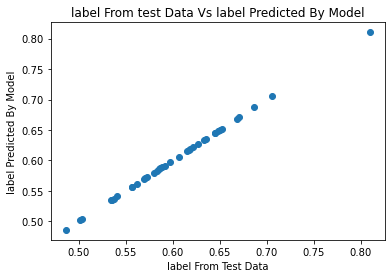

In [88]:
plt.scatter(y_test, model.predict(X_test))
plt.xlabel('label From Test Data')
plt.ylabel('label Predicted By Model')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("label From test Data Vs label Predicted By Model")

Text(0.5, 1.0, 'Histogram of Residuals')

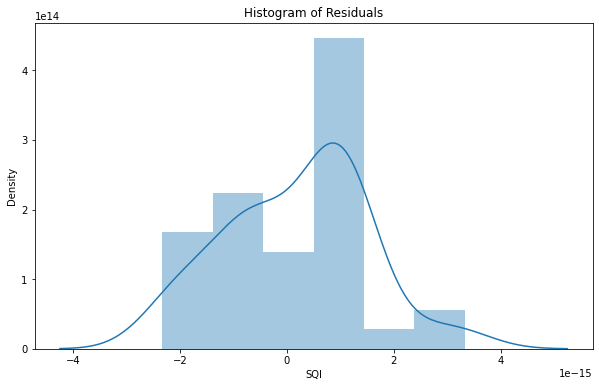

In [89]:
sns.distplot((y_test-model.predict(X_test)))
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Histogram of Residuals")

In [90]:
yhead = model.predict(X_train)

In [91]:
r2_score(y_train, yhead)

1.0

In [92]:
cross_val_score_train = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')
print(cross_val_score_train)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [93]:
cross_val_score_train.mean()

1.0

In [94]:
ypred = model.predict(X_test)

In [95]:
print(r2_score(y_test, ypred))

1.0


In [96]:
#For Third model test data
RMSE = sqrt(mean_squared_error(y_test, ypred))
RMSE

1.3160080918368756e-15

In [97]:
MAPE = mean_absolute_percentage_error(y_test, ypred)
MAPE

1.882127241086972e-13

In [103]:
# Performance metrics
errors = abs(ypred - y_test)
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(MAPE)
print('Accuracy:', round(accuracy, 2), '%.')

Average absolute error: 0.0 degrees.
Accuracy: 100.0 %.


In [98]:
y_pred1 = pd.DataFrame(ypred, columns=['Estimated label'])
y_pred1.head()

,Estimated label
0,0.615707
1,0.648514
2,0.501631
3,0.556239
4,0.633337


In [99]:
y_test1 = pd.DataFrame(y_test)
y_test1 = y_test1.reset_index(drop=True)
y_test1.head()

,SQI
0,0.615707
1,0.648514
2,0.501631
3,0.556239
4,0.633337


In [100]:
ynew = pd.concat([y_test1, y_pred1], axis=1)
ynew.head()

,SQI,Estimated label
0,0.615707,0.615707
1,0.648514,0.648514
2,0.501631,0.501631
3,0.556239,0.556239
4,0.633337,0.633337


Text(0.5, 1.0, 'label From test Data Vs label Predicted By Model')

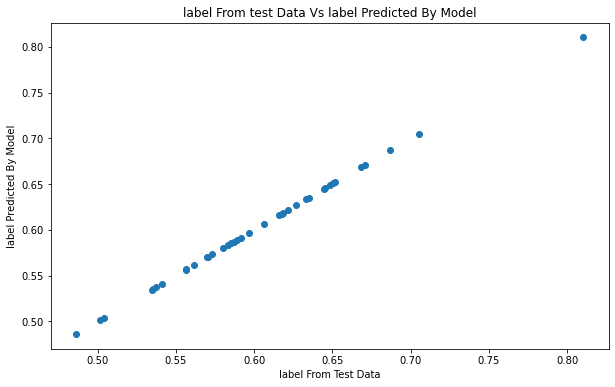

In [101]:
plt.scatter(y_test1, y_pred1)
plt.xlabel('label From Test Data')
plt.ylabel('label Predicted By Model')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("label From test Data Vs label Predicted By Model")